# The Neural Dynanmics of Valence and Intensity Encoding in the Amygdala and Prefrontal Cortex

**Authors:** Rahim Hashim, Roberto Gulli, Stefano Fusi, Daniel Salzman <br>
**Notebook Owner:** Rahim Hashim (rh2898@columbia.edu) <br>
***

# Import Libraries / Setting Task Parameters

In [1]:
%load_ext autoreload
%autoreload 2
import os
import sys
import numpy as np
import pandas as pd
from pprint import pprint
import matplotlib.pyplot as plt
# Custom modules
import h5_helper
import preprocess_helper
from Path import Path
from Session import Session
pd.options.mode.chained_assignment = None  # default='warn'

ROOT = '/Users/rahimhashim/Google Drive/My Drive/Columbia/Salzman/Monkey-Training/'
# ROOT = '/mnt/g/My Drive/Columbia/Salzman/Monkey-Training/'
EXPERIMENT = 'rhAirpuff'
TASK = 'Probabalistic_Airpuff_4x2'

path_obj = Path(ROOT, EXPERIMENT, TASK)

***
# Selecting Dates

In [2]:
# Specifying date/monkey/task
start_date = '2022-09-13' #@param {type:"date"}
end_date = '2022-11-23' #@param {type:"date"}
monkey_input = 'Aragorn' #@param ['Aragorn', 'Gandalf', 'Rob', 'Test']
reprocess_data = False #@param {type:"boolean"}
save_df =  False #@param {type:"boolean"}

# parse data
h5_filenames = h5_helper.h5_pull(path_obj.current_dir) # pull all .h5 files from specified directory
ml_config, trial_record, session_df, error_dict, behavioral_code_dict\
	= preprocess_helper.preprocess_data(h5_filenames,
																			path_obj,
																			start_date,
																			end_date,
																			monkey_input,
																			reprocess_data,
																			save_df)

dates_selected = ['220913', '220928', '220929', '221006', '221019', '221026']
session_df = session_df.loc[(session_df['date'].isin(dates_selected))]

Pulling '.h5' files...
Complete: 57 '.h5' files pulled

Files uploaded from processed folder

Pickled Files:
['220913_Aragorn_r1r2_behave.pkl',
 '220914_Aragorn_r1r2_behave.pkl',
 '220915_Aragorn_r1r2_behave.pkl',
 '220916_Aragorn_r1r2_behave.pkl',
 '220919_Aragorn_r1r2_behave.pkl',
 '220920_Aragorn_r1r2_behave.pkl',
 '220921_Aragorn_r1r2_behave.pkl',
 '220923_Aragorn_r1r2_behave.pkl',
 '220926_Aragorn_r1r2_behave.pkl',
 '220927_Aragorn_r1r2_behave.pkl',
 '220928_Aragorn_r1r2_behave.pkl',
 '220929_Aragorn_r1r2_behave.pkl',
 '221004_Aragorn_r1r2_behave.pkl',
 '221005_Aragorn_r1r2_behave.pkl',
 '221006_Aragorn_r1r2_behave.pkl',
 '221018_Aragorn_r1r2_behave.pkl',
 '221019_Aragorn_r1r2_behave.pkl',
 '221020_Aragorn_r1r2_behave.pkl',
 '221021_Aragorn_r1r2_behave.pkl',
 '221025_Aragorn_r1r2_behave.pkl',
 '221026_Aragorn_r1r2_behave.pkl',
 '221027_Aragorn_r1r2_behave.pkl',
 '221028_Aragorn_r1r2_behave.pkl',
 '221031_Aragorn_r1r2_behave.pkl',
 '221101_Aragorn_r1r2_behave.pkl']


***
# Adding Fields / Creating Session Object

In [190]:
import add_fields
import importlib
importlib.reload(add_fields)

# session_obj contains session metadata
session_obj = Session(session_df, monkey_input, TASK, behavioral_code_dict)

# adds custom fields
session_df, session_obj = add_fields.add_fields(session_df,
																								session_obj, 
																								behavioral_code_dict)
from image_diff import image_diff
FIGURE_SAVE_PATH = image_diff(session_df,
															session_obj,
															path_obj,
															combine_dates=True)
session_obj.save_paths(path_obj.TARGET_PATH, 
											 path_obj.TRACKER_PATH, 
											 path_obj.VIDEO_PATH,
											 FIGURE_SAVE_PATH)
session_df_correct = session_df[session_df['correct'] == 1]

 Creating Session Objects...
  Max Values (X,Y): (-24.048,-33.547)
  Max Values (X,Y): (76.956,105.866)
 Adding additional fields to session_df DataFrame...
  20 new fields added.
  Index(['date', 'session_num', 'subject', 'trial_num', 'block', 'condition',
         'correct', 'error', 'error_type', 'behavioral_code_markers',
         'behavioral_code_times', 'stimuli_name', 'x_pos', 'y_pos', 'reward',
         'reward_prob', 'reward_mag', 'reward_drops', 'reward_length', 'airpuff',
         'airpuff_prob', 'airpuff_mag', 'airpuff_pulses', 'airpuff_side_L',
         'airpuff_side_R', 'eye_x', 'eye_y', 'eye_pupil', 'lick', 'photodiode',
         'trial_start', 'trial_datetime_start', 'trial_datetime_end',
         'Start Trial', 'Fixation On', 'Fixation Success', 'CS On', 'CS Off',
         'Trace Start', 'Trace End', 'Outcome Start', 'Reward Trigger',
         'Airpuff Trigger', 'Outcome', 'Outcome End', 'Manual Reward',
         'End Trial', 'valence', 'lick_raster', 'blink_raster', '

***
## Eye Analysis

257000
H_sum: 0.010000000000000002
-40.0   -30.0   -20.0   -10.0   0.0   10.0   20.0   30.0   
[[0.     0.     0.0012 0.0021 0.     0.     0.     0.    ]
 [0.     0.0003 0.0054 0.0036 0.     0.     0.     0.    ]
 [0.0003 0.     0.0083 0.0037 0.     0.     0.     0.    ]
 [0.0003 0.0069 0.022  0.0537 0.0523 0.017  0.0092 0.0005]
 [0.0009 0.007  0.0201 0.3248 0.3467 0.0223 0.0017 0.0003]
 [0.     0.0009 0.0043 0.0121 0.0205 0.     0.     0.    ]
 [0.     0.0013 0.018  0.0299 0.0025 0.     0.     0.    ]
 [0.     0.     0.     0.     0.     0.     0.     0.    ]]
outside x,y [-10, 10]: 17.95%


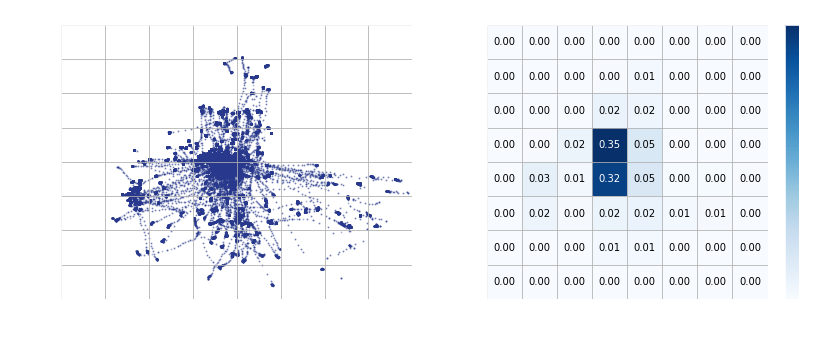

264000
H_sum: 0.01
-40.0   -30.0   -20.0   -10.0   0.0   10.0   20.0   30.0   
[[0.     0.0006 0.0053 0.0078 0.     0.     0.     0.    ]
 [0.0011 0.0017 0.0036 0.0016 0.     0.     0.     0.    ]
 [0.0003 0.0009 0.0086 0.0033 0.0015 0.0005 0.0005 0.    ]
 [0.0006 0.0045 0.0202 0.1054 0.0653 0.0142 0.0113 0.    ]
 [0.0001 0.0061 0.0234 0.3483 0.2367 0.0153 0.0029 0.0006]
 [0.0005 0.0041 0.0055 0.0257 0.0082 0.0005 0.     0.    ]
 [0.0024 0.0019 0.0251 0.0318 0.0021 0.     0.     0.    ]
 [0.     0.0002 0.     0.     0.     0.     0.     0.    ]]
outside x,y [-10, 10]: 20.95%


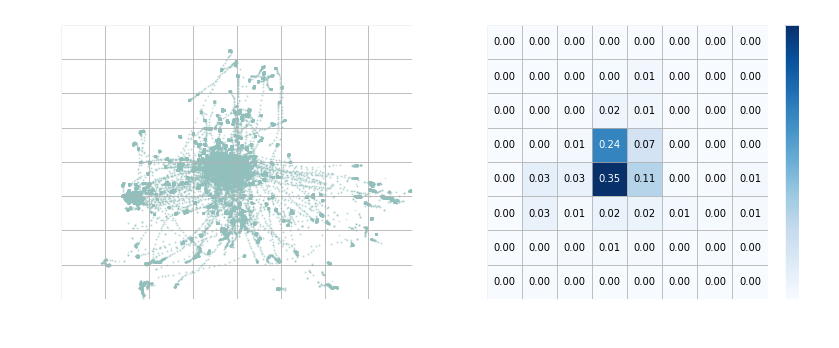

262500
H_sum: 0.01
-40.0   -30.0   -20.0   -10.0   0.0   10.0   20.0   30.0   
[[0.     0.0009 0.0083 0.0075 0.     0.     0.     0.    ]
 [0.0013 0.0046 0.0124 0.0108 0.0004 0.     0.     0.0006]
 [0.0006 0.0005 0.0196 0.0192 0.0031 0.0044 0.0001 0.    ]
 [0.0013 0.0036 0.043  0.11   0.0827 0.0155 0.0219 0.0049]
 [0.0021 0.0057 0.03   0.2349 0.1594 0.0151 0.024  0.0029]
 [0.0007 0.0007 0.0156 0.0179 0.0066 0.0058 0.0019 0.    ]
 [0.0014 0.0076 0.0416 0.0434 0.003  0.0022 0.     0.    ]
 [0.     0.     0.     0.     0.     0.     0.     0.    ]]
outside x,y [-10, 10]: 35.55%


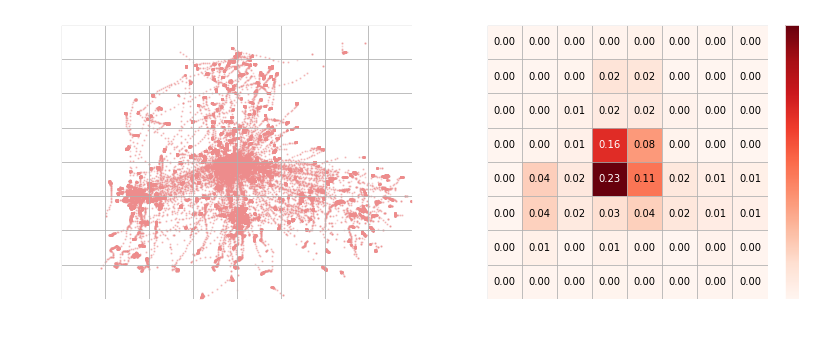

256000
H_sum: 0.010000000000000002
-40.0   -30.0   -20.0   -10.0   0.0   10.0   20.0   30.0   
[[0.     0.0017 0.0057 0.0147 0.     0.     0.     0.    ]
 [0.0006 0.0033 0.0093 0.0167 0.0012 0.     0.     0.    ]
 [0.0021 0.0048 0.0238 0.0181 0.0008 0.0016 0.     0.    ]
 [0.     0.0037 0.0639 0.1153 0.0987 0.0254 0.0239 0.    ]
 [0.0004 0.0045 0.0218 0.1877 0.1391 0.0225 0.0124 0.0042]
 [0.0008 0.0048 0.0203 0.0092 0.0062 0.0053 0.004  0.    ]
 [0.0018 0.0031 0.0559 0.0539 0.0042 0.0008 0.0016 0.    ]
 [0.     0.0001 0.     0.     0.     0.     0.     0.    ]]
outside x,y [-10, 10]: 39.08%


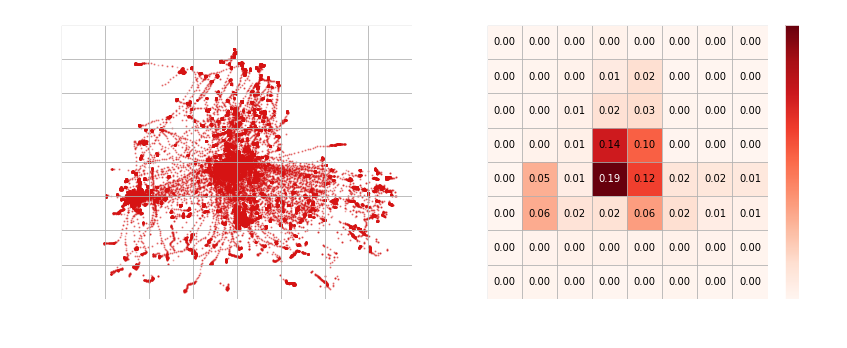

In [210]:
from eyetracking_analysis import eyetracking_analysis
eyetracking_analysis(session_df_correct, session_obj, TRIAL_THRESHOLD=10)
# session_blink = session_df_correct[session_df_correct['blink_in_window'] == 1]
# eyetracking_analysis(session_blink, session_obj)

In [224]:
session_df_correct['blink_in_window']

0        0.0
1        1.0
2        1.0
3        1.0
4        1.0
        ... 
11372    1.0
11373    1.0
11375    1.0
11376    1.0
11386    1.0
Name: blink_in_window, Length: 2467, dtype: float64

[(-21.1916846780187, -9.973426461960578), (-21.1916846780187, -9.973426461960578), (-21.156926421285274, -9.95072616004475), (-21.156926421285274, -9.95072616004475), (-21.149043951821525, -9.950129612540012), (-21.149043951821525, -9.950129612540012), (-21.149043951821525, -9.950129612540012), (-21.149043951821525, -9.950129612540012), (-21.137363427399315, -9.945231930807951), (-21.137363427399315, -9.945231930807951), (-21.121455890255607, -9.948041740285838), (-21.121455890255607, -9.948041740285838), (-20.900639666306354, -9.935343481921182), (-20.900639666306354, -9.935343481921182), (-20.26372121569941, -9.963369590367707), (-20.26372121569941, -9.963369590367707), (-20.26372121569941, -9.963369590367707), (-19.351721241440234, -10.074815099595446), (-19.351721241440234, -10.074815099595446), (-18.394038358445172, -10.158612996156096), (-17.486570946796192, -10.089710361180986), (-17.486570946796192, -10.089710361180986), (-16.270959860938643, -11.193342948853621), (-16.27095986

(-40.0, 40.0)

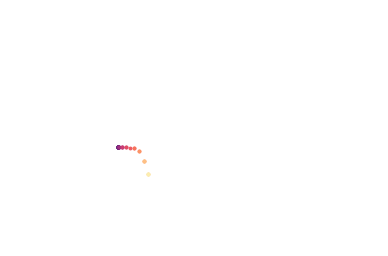

In [243]:
import matplotlib.cm as cm
from matplotlib.colors import Normalize
import seaborn as sns

trial_no = 4
num_samples = 30

palette_tab10 = sns.color_palette("magma", num_samples)

trace_start = session_df_correct.iloc[trial_no]['Trace Start']
trace_end = session_df_correct.iloc[trial_no]['Trace End']
eye_x = session_df_correct.iloc[trial_no]['eye_x'][trace_start:trace_end]
eye_y = session_df_correct.iloc[trial_no]['eye_y'][trace_start:trace_end]
pupil = session_df_correct.iloc[trial_no]['eye_pupil'][trace_start:trace_end]
first_blink = np.where(pupil==0)[0][0]

eye_x_preblink = eye_x[first_blink-num_samples:first_blink]
eye_y_preblink = eye_y[first_blink-num_samples:first_blink]

eye_preblink = list(zip(eye_x_preblink, eye_y_preblink))
print(eye_preblink)
for eye_index, eye_pos in enumerate(eye_preblink):
	plt.scatter(eye_pos[0], eye_pos[1], s=8, color=palette_tab10[eye_index])
plt.xlim(-40, 40)
plt.ylim(-40, 40)

***
## Run All Analysis Functions

  lick_vs_blink.png saved.
  perf_by_fractal.png saved.
  session_latency.png saved.
  outcome_params.png saved.
  session_lick_avg.png saved.
  session_blink_avg.png saved.
  fractal_lick_raster.png saved.
  fractal_blink_raster.png saved.
  raster_by_cond_1.png saved.
  raster_by_cond_2.png saved.
 [0.0, 0.5, 1.0] ANOVA 0.029 | P-value: 9.71E-01
  (0, 1) T-value: 0.214 P-value: 8.31E-01 |  Z-value: 0.211 P-value: 8.33E-01
    0 Lick Mean: 1.788 Lick Std: 1.242 Trials: 123
    1 Lick Mean: 1.748 Lick Std: 1.181 Trials: 63
  (0, 2) T-value: 0.184 P-value: 8.54E-01 |  Z-value: 0.178 P-value: 8.59E-01
    0 Lick Mean: 1.788 Lick Std: 1.242 Trials: 123
    2 Lick Mean: 1.755 Lick Std: 1.106 Trials: 64
  (1, 2) T-value: -0.035 P-value: 9.72E-01 |  Z-value: -0.035 P-value: 9.72E-01
    1 Lick Mean: 1.748 Lick Std: 1.181 Trials: 63
    2 Lick Mean: 1.755 Lick Std: 1.106 Trials: 64
  grant_reward.png saved.
 [0.0, 0.5, 1.0] ANOVA 2.55 | P-value: 8.02E-02
  (0, 1) T-value: 0.996 P-value: 3.21E

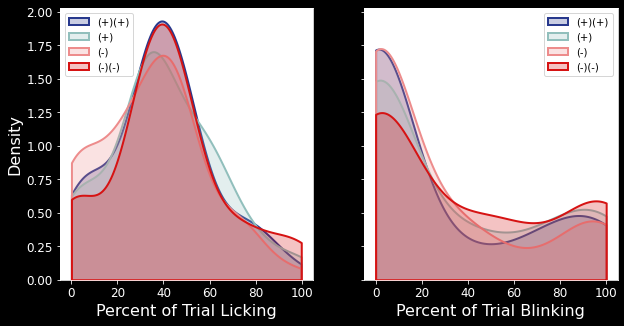

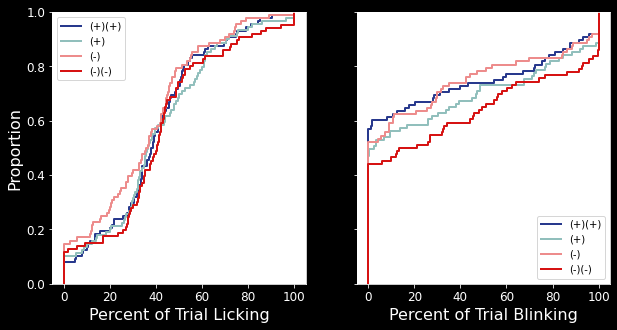

In [ ]:
from run_functions import run_functions
session_obj = run_functions(session_df_correct, session_obj, path_obj, 
														behavioral_code_dict, error_dict, FIGURE_SAVE_PATH)

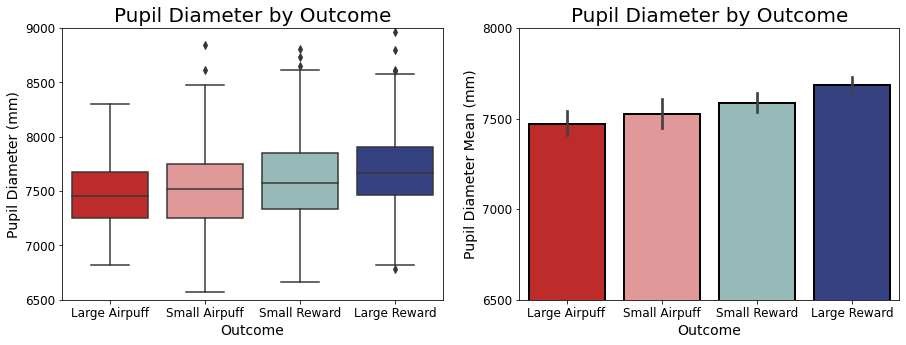

valence
-1.0     79
-0.5    118
 0.5    223
 1.0    283
Name: pupil_mean, dtype: int64
         pupil_preblink
valence                
-1.0                110
-0.5                127
 0.5                 77
 1.0                 77


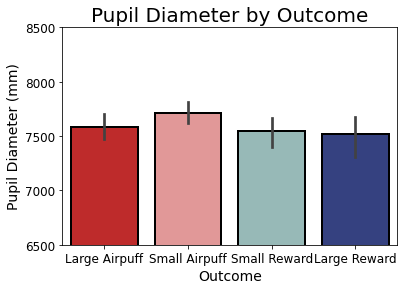

In [39]:
from pupil_analysis import pupil_valence_no_blink, pupil_preblink
pupil_valence_no_blink(session_df_correct, session_obj)
pupil_preblink(session_df_correct, session_obj)

In [40]:
def anticipatory_behavior(session_df_correct, session_obj, behavioral_code_dict, error_dict):
	keys = ['blink_duration_offscreen',
					'blink_duration_sig',
					'lick_duration',
					'pupil_window', ]
	valences = sorted(session_df_correct['valence'].unique(), reverse=True)
	for key in keys:
		print(key)
		for valence in valences:
			measure_list = []
			df_valence = session_df_correct[session_df_correct['valence'] == valence]
			for index, trial in df_valence.iterrows():
				measure_list.append(np.sum(trial[key]))
			print('  valence:', valence)
			print('    mean:', round(np.nanmean(measure_list), 3))
			print('    std:', round(np.std(measure_list), 3))

anticipatory_behavior(session_df_correct, session_obj, behavioral_code_dict, error_dict)

blink_duration_offscreen
  valence: 1.0
    mean: 0.244
    std: 0.332
  valence: 0.5
    mean: 0.304
    std: 0.349
  valence: -0.5
    mean: 0.44
    std: 0.366
  valence: -1.0
    mean: 0.492
    std: 0.365
blink_duration_sig
  valence: 1.0
    mean: 0.002
    std: 0.017
  valence: 0.5
    mean: 0.003
    std: 0.018
  valence: -0.5
    mean: 0.006
    std: 0.038
  valence: -1.0
    mean: 0.008
    std: 0.063
lick_duration
  valence: 1.0
    mean: 3.913
    std: 1.216
  valence: 0.5
    mean: 3.612
    std: 1.343
  valence: -0.5
    mean: 2.721
    std: 1.765
  valence: -1.0
    mean: 2.774
    std: 1.74
pupil_window
  valence: 1.0
    mean: 10761066.166
    std: 951005.915
  valence: 0.5
    mean: 10650593.045
    std: 1051007.448
  valence: -0.5
    mean: 10431441.992
    std: 1520964.692
  valence: -1.0
    mean: 10300604.864
    std: 1717494.37


221123


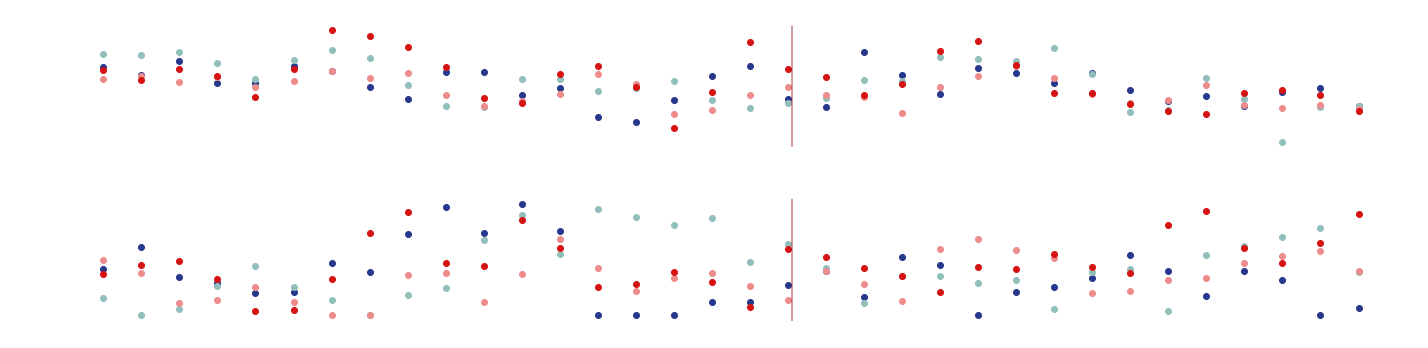

In [ ]:
def measure_window(session_df, session_obj):

	correct_trial_count = len(session_df['correct'])
	range_count = np.arange(0, correct_trial_count+1, 10)
	valence_list = sorted(session_df['valence'].unique(), reverse=True)
	window_size = session_obj.window_lick
	f, (ax1, ax2) = plt.subplots(2, 1, figsize=(20, 5))

	for r_index, upper_lim in enumerate(range_count[1:]):
		lower_lim = range_count[r_index-1]
		df_range = session_df.iloc[lower_lim:upper_lim]
		for v_index, valence in enumerate(valence_list):
			color = session_obj.valence_colors[v_index]
			df_valence = df_range[df_range['valence'] == valence]
			lick_count_valence = float(df_valence['lick_count_window'].apply(lambda x: np.nansum(x)).mean()/window_size)
			ax1.scatter(upper_lim, lick_count_valence, color=color)
			ax1.set_title('Lick Duration')
			blink_count_valence = float(df_valence['blink_count_window'].apply(lambda x: np.nansum(x)).mean()/window_size)
			ax2.scatter(upper_lim, blink_count_valence, color=color)
			ax2.set_title('Blink Duration')

	session_df['block_change'] = session_df['block'].diff()
	block_change_trials = np.nonzero(session_df['block_change'].tolist())[0]
	block_change = -1
	if len(block_change_trials) > 1:
		block_change = np.nonzero(session_df['block_change'].tolist())[0][1]
		ax1.axvline(x=block_change+1, c='darkred', alpha=0.5)
		ax2.axvline(x=block_change+1, c='darkred', alpha=0.5)
	f.tight_layout()
	plt.show()


for date in session_df_correct['date'].unique():
	session_df_date = session_df_correct[session_df_correct['date'] == date]
	print(date)
	measure_window(session_df_date, session_obj)

In [41]:
for valence in sorted(session_df_correct['valence'].unique(), reverse=True):
	df = session_df_correct[session_df_correct['valence'] == valence]
	print(valence, df['eye_distance'].mean())

1.0 57.25443821138401
0.5 71.27570719562952
-0.5 111.41944725581715
-1.0 112.98568369473662


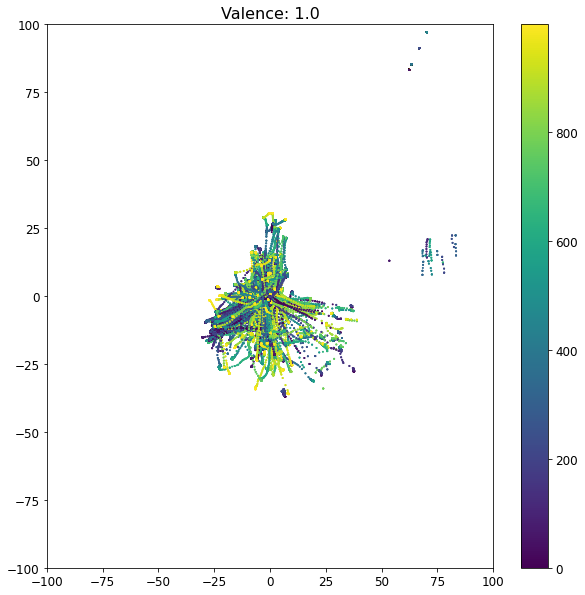

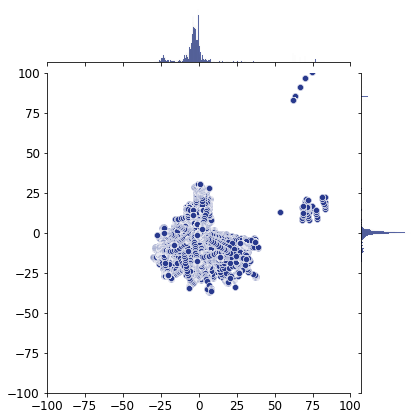

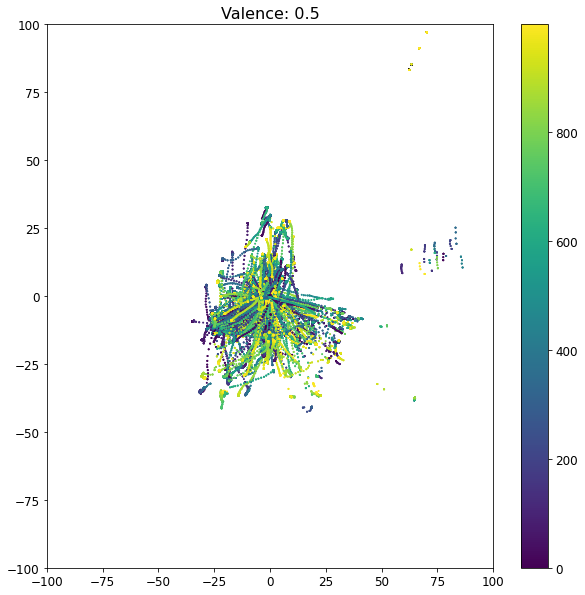

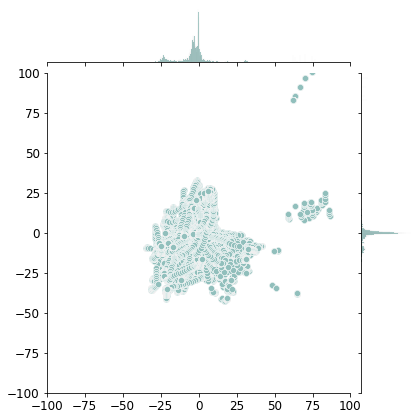

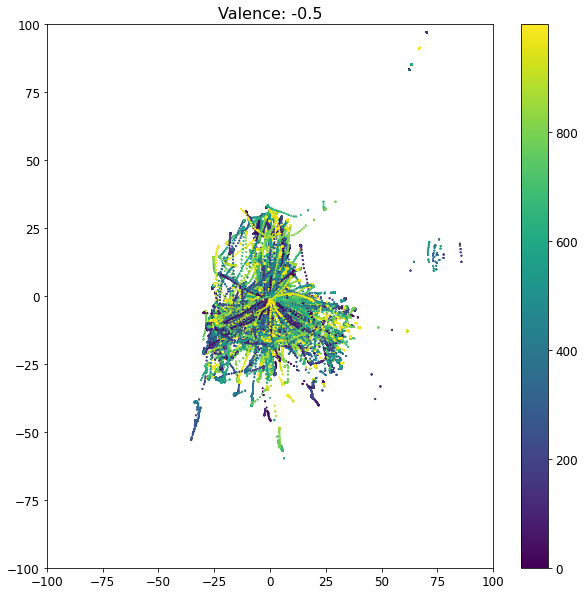

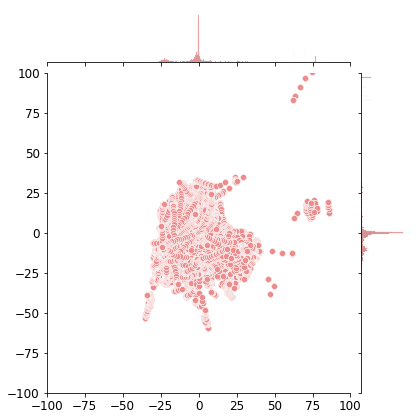

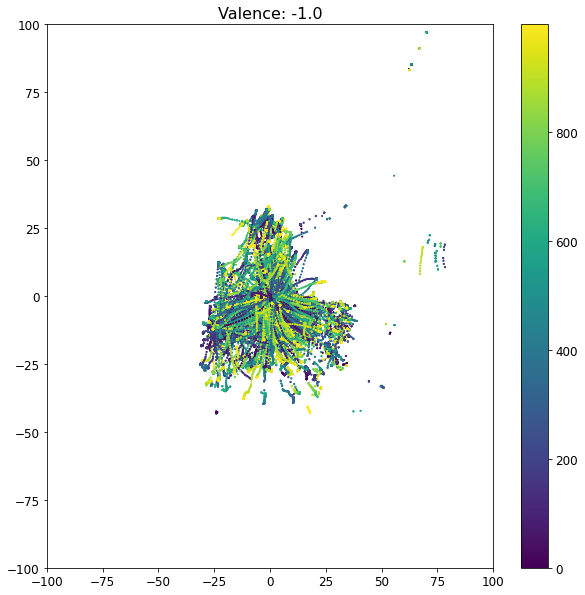

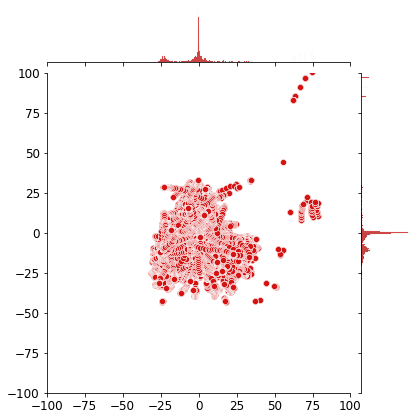

In [42]:
import matplotlib.pyplot as plt
from plot_helper import set_plot_params

def eye_data_delay(row, trace_window):
	delay_end = row['Trace End']
	eye_x = row['eye_x'][delay_end-trace_window:delay_end]
	eye_y = row['eye_y'][delay_end-trace_window:delay_end]
	row['eye_x_delay'] = eye_x
	row['eye_y_delay'] = eye_y
	return row

def eye_outside_threshold(row):
	blink_count_window = row['blink_count_window']
	eye_x = row['eye_x_delay']
	eye_y = row['eye_y_delay']
	try:
		# print(list(zip(eye_x, eye_y, blink_raster)))
		eye_x_threshold = [x for x_index, x in enumerate(eye_x)
												if blink_count_window[x_index] == 1]
		eye_y_threshold = [y for y_index, y in enumerate(eye_y)
												if blink_count_window[y_index] == 1]
	except:
		eye_x_threshold = []
		eye_y_threshold = []
	row['eye_x_threshold'] = eye_x_threshold
	row['eye_y_threshold'] = eye_y_threshold
	return row

def eye_signal_delay(row, session_obj):
	eye_blink_signal = session_obj.blink_signal
	BLINK_SIGNAL = [(eye_blink_signal['eye_x_min'], eye_blink_signal['eye_y_min']),
									(eye_blink_signal['eye_x_max'], eye_blink_signal['eye_y_max'])]
	eye_x = row['eye_x_delay']
	eye_y = row['eye_y_delay']
	blink_count = [1 if (x,y) in BLINK_SIGNAL else 0 
									for (x,y) in zip(eye_x, eye_y)]
	eye_x_threshold = [x for x_index, x in enumerate(eye_x)
											if blink_count[x_index] == 0]
	eye_y_threshold = [y for y_index, y in enumerate(eye_y)
											if blink_count[y_index] == 0]

	row['eye_x_sig'] = eye_x_threshold
	row['eye_y_sig'] = eye_y_threshold

	return row

def plot_eye_data(session_df, session_obj):
	import seaborn as sns

	# trial_numbers = input('Enter trial numbers to plot (e.g. 1,2,3...{}): '.format(len(session_df)))
	# row = session_df.iloc[int(trial_numbers)]
	# trial_numbers = list(row.index)
	COLORS = session_obj.valence_colors
	session_df = session_df.apply(eye_data_delay, 
					trace_window = session_obj.window_blink, axis=1)
	session_df = session_df.apply(eye_outside_threshold, axis=1)
	session_df = session_df.apply(eye_signal_delay, 
															  session_obj=session_obj,
																axis=1)
	for v_index, valence in enumerate(sorted(session_df['valence'].unique(), reverse=True)):
		set_plot_params(FONT=12,
										AXES_TITLE=16,
										AXES_LABEL=18, 
										TICK_LABEL=12, 
										LEGEND=10, 
										TITLE=20)
		f, ax = plt.subplots(1, 1, figsize=(10, 10))
		df = session_df[session_df['valence'] == valence]
		for index, row in df.iterrows():
			x = row['eye_x_delay']
			y = row['eye_y_delay']
			z = list(range(len(row['eye_x_delay'])))
			scatterplot = ax.scatter(x, y, c=z, cmap='viridis', s=1)
		
		eye_x = df['eye_x_delay'].tolist()
		eye_y = df['eye_y_delay'].tolist()
		x_flatten = [item for sublist in eye_x for item in sublist]
		y_flatten = [item for sublist in eye_y for item in sublist]
		# ax2.hist2d(x_flatten, y_flatten, bins=100, cmap='viridis', 
		# 							range=[[-100, 100], [-100, 100]], 
		# 							density=True)
		sns.jointplot(x=x_flatten, 
									y=y_flatten, 
									color=COLORS[v_index],
									xlim = (-100,100),
									ylim = (-100,100))

		ax.set_title('Valence: {}'.format(valence))
		ax.set_xlim([-100, 100])
		ax.set_ylim([-100, 100])
		f.colorbar(scatterplot, ax=ax)

TRIAL_THRESHOLD = 10
# only include trials after subject has seen fractal <TRIAL_THRESHOLD> number of times
session_df_count = session_df_correct[session_df_correct['fractal_count_in_block'] > TRIAL_THRESHOLD]
plot_eye_data(session_df_count, session_obj)

  lick_blink_hist.png saved.
  lick_blink_cdf.png saved.
Lick
  (+)(+) vs (+): ks_stat: 0.12, p_val: 3.99E-04
  (+)(+) vs (-): ks_stat: 0.33, p_val: 1.57E-29
  (+)(+) vs (-)(-): ks_stat: 0.32, p_val: 7.91E-29
  (+) vs (-): ks_stat: 0.25, p_val: 7.77E-16
  (+) vs (-)(-): ks_stat: 0.24, p_val: 1.33E-15
  (-) vs (-)(-): ks_stat: 0.04, p_val: 8.16E-01
Blink
  (+)(+) vs (+): ks_stat: 0.12, p_val: 2.55E-04
  (+)(+) vs (-): ks_stat: 0.29, p_val: 3.92E-24
  (+)(+) vs (-)(-): ks_stat: 0.36, p_val: 5.83E-35
  (+) vs (-): ks_stat: 0.21, p_val: 6.41E-12
  (+) vs (-)(-): ks_stat: 0.26, p_val: 1.33E-15
  (-) vs (-)(-): ks_stat: 0.08, p_val: 5.79E-02


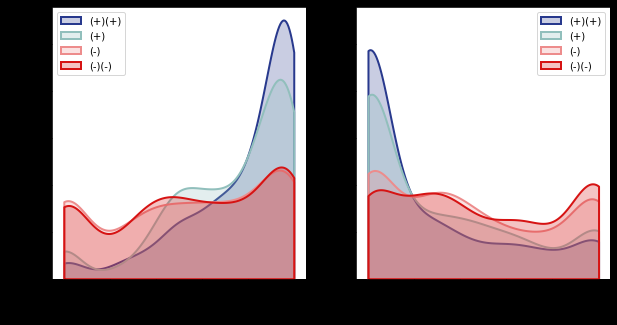

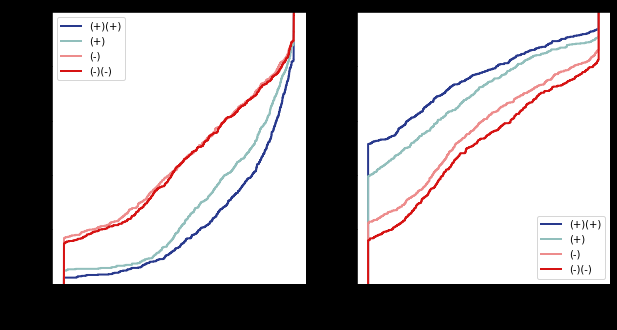

In [43]:
from measure_hist import measure_hist
measure_hist(session_df_correct, session_obj)

In [44]:
from grant_plots import grant_plots
grant_plots(session_df_correct, session_obj)

 [0.0, 0.5, 1.0] ANOVA 118.635 | P-value: 5.34E-49
  (0, 1) T-value: -10.892 P-value: 2.64E-26 |  Z-value: -9.958 P-value: 2.33E-23
    0 Lick Mean: 2.655 Lick Std: 1.785 Trials: 869
    1 Lick Mean: 3.624 Lick Std: 1.356 Trials: 434
  (0, 2) T-value: -15.42 P-value: 5.68E-49 |  Z-value: -13.522 P-value: 1.16E-41
    0 Lick Mean: 2.655 Lick Std: 1.785 Trials: 869
    2 Lick Mean: 3.951 Lick Std: 1.197 Trials: 424
  (1, 2) T-value: -3.735 P-value: 2.00E-04 |  Z-value: -3.73 P-value: 1.92E-04
    1 Lick Mean: 3.624 Lick Std: 1.356 Trials: 434
    2 Lick Mean: 3.951 Lick Std: 1.197 Trials: 424
  grant_reward.png saved.
 [0.0, 0.5, 1.0] ANOVA 99.35 | P-value: 1.46E-41
  (0, 1) T-value: -10.116 P-value: 1.09E-22 |  Z-value: -10.56 P-value: 4.57E-26
    0 Blink Mean: 0.237 Blink Std: 0.328 Trials: 858
    1 Blink Mean: 0.451 Blink Std: 0.375 Trials: 437
  (0, 2) T-value: -12.32 P-value: 5.26E-32 |  Z-value: -12.783 P-value: 2.03E-37
    0 Blink Mean: 0.237 Blink Std: 0.328 Trials: 858
    2 

In [ ]:
import os
import numpy as np
import pandas as pd
from scipy import signal
from decimal import Decimal
import matplotlib.pyplot as plt
from collections import defaultdict
from itertools import combinations, permutations
from scipy.stats import ttest_ind, ttest_ind_from_stats
import warnings
warnings.filterwarnings("ignore")

# Custom Functions
from plot_helper import smooth_plot, round_up_to_odd, moving_avg, set_plot_params
from two_sample_test import two_sample_test

def epoch_time(df):
	# taking the minimum length of epochs to find cutoff values
	# for each epoch of task
	cs_duration_hist = np.array(df['CS Off'].tolist()) - np.array(df['CS On'].tolist())
	cs_end_min = min(cs_duration_hist)
	trace_duration_hist = np.array(df['Trace End'].tolist()) - np.array(df['Trace Start'].tolist())
	trace_end_min = min(trace_duration_hist) + cs_end_min
	outcome_duration_hist = np.array(df['trial_bins'].tolist()) - np.array(df['Trace End'].tolist())
	outcome_end_min = min(outcome_duration_hist) + cs_end_min - 1 # not sure why I included -1 but it was necessary, check this
	return cs_end_min, trace_end_min, outcome_end_min

def raster_by_condition(session_df, behavioral_code_dict, error_dict, session_obj):

	set_plot_params(FONT=20, AXES_TITLE=22, AXES_LABEL=20, TICK_LABEL=20, LEGEND=16, TITLE=28)

	PRE_CS = 50 # time before CS-on (for moving average calculation)
	FIGURE_SAVE_PATH = session_obj.figure_path
	COLORS = session_obj.valence_colors
	WINDOW_THRESHOLD_LICK = session_obj.window_lick
	WINDOW_THRESHOLD_BLINK = session_obj.window_blink

	lick_dict = defaultdict(list)
	blink_dict = defaultdict(list)
	pupil_dict = defaultdict(list)

	lick_epoch_dict = defaultdict(lambda:defaultdict(list))
	blink_epoch_dict = defaultdict(lambda:defaultdict(list))
	pupil_epoch_dict = defaultdict(lambda:defaultdict(list))

	lick_data_probability = defaultdict(list)
	blink_data_probability = defaultdict(list)

	lick_data_duration = defaultdict(list)
	blink_data_duration = defaultdict(list)
	pupil_data_binary = defaultdict(list)

	gs_kw = dict(width_ratios=[5, 1])
	f, axarr = plt.subplots(2,2, gridspec_kw=gs_kw, sharey = False, figsize=(50,20))

	LABELS = session_obj.stim_labels
	num_fractals = len(LABELS)

	TRIAL_THRESHOLD = 20

	# only include trials after subject has seen fractal <TRIAL_THRESHOLD> number of times
	session_df_count = session_df[session_df['fractal_count_in_block'] > TRIAL_THRESHOLD]
	# only include one switch (for now)
	session_df_threshold = session_df_count[session_df_count['block'] <= 2]

	# calculate minimum epoch times
	cs_time_min, trace_time_min, outcome_time_min = epoch_time(session_df_threshold)

	valence_list = sorted(session_df_threshold['valence'].unique(), reverse=True)
	for df_index, valence in enumerate(valence_list):

		df = session_df_threshold[session_df_threshold['valence'] == valence]

		# valence-specific session lick/blink data
		lick_data_raster = df['lick_raster'].tolist()
		blink_data_raster = df['blink_raster'].tolist()
		pupil_data = df['eye_pupil'].tolist()

		# single bin lick data (-<WINDOW_THRESHOLD>ms from trace interval end)

		for t_index, trial in enumerate(lick_data_raster):

			cs_on_time = df['CS On'].iloc[t_index]
			trace_on_time = df['Trace Start'].iloc[t_index]
			trace_off_time = df['Trace End'].iloc[t_index]

			# Lick/Blink Probability
			## counts if there was any lick in the specified time window
			lick_data_window = df['lick_count_window'].iloc[t_index]
			if 1 in lick_data_window:
				lick_data_probability[df_index].append(1)
			else:
				lick_data_probability[df_index].append(0)

			## counts if there was any blink in the specified time window
			blink_data_window = df['blink_count_window'].iloc[t_index]
			if 1 in blink_data_window:
				blink_data_probability[df_index].append(1)
				pupil_data_trial = range(10000) # for min trial pupil length
			else:
				blink_data_probability[df_index].append(0)
				# only add pupil data if there was no blink
				pupil_data_window = pupil_data[t_index][trace_off_time-WINDOW_THRESHOLD_LICK:trace_off_time]
				pupil_data_window_mean = np.mean(pupil_data_window)
				pupil_data_binary[df_index].append(pupil_data_window_mean)
				pupil_data_trial = pupil_data[t_index][cs_on_time-PRE_CS:]

			# Lick/Blink Duration
			lick_raw = df['lick'].iloc[t_index]
			lick_data_voltage = lick_raw[trace_off_time-WINDOW_THRESHOLD_LICK:trace_off_time]
			lick_data_voltage_mean = np.mean(lick_data_voltage)
			lick_data_duration[df_index].append(lick_data_voltage_mean)

			blink_raw = df['blink_duration_offscreen'].iloc[t_index]
			blink_data_duration[df_index].append(blink_raw)

			lick_data_trial = lick_data_raster[t_index][cs_on_time-PRE_CS:]
			blink_data_trial = blink_data_raster[t_index][cs_on_time-PRE_CS:]

			lick_data_cs = lick_data_raster[t_index][cs_on_time:trace_on_time]
			lick_data_trace = lick_data_raster[t_index][trace_on_time:trace_off_time]
			lick_data_outcome = lick_data_raster[t_index][trace_off_time:]

			blink_data_cs = blink_data_raster[t_index][cs_on_time:trace_on_time]
			blink_data_trace = blink_data_raster[t_index][trace_on_time:trace_off_time]
			blink_data_outcome = blink_data_raster[t_index][trace_off_time:]

			time = np.arange(len(lick_data_trial))

			# lick_data_trial and blink_data_trial are sometimes off by 1 frame
			# 	must investigate further
			shorter_trial_data = min(len(lick_data_trial), len(blink_data_trial), len(pupil_data_trial))
			for bin_num in range(shorter_trial_data):
				lick_dict[bin_num].append(lick_data_trial[bin_num])
				blink_dict[bin_num].append(blink_data_trial[bin_num])
				if 1 not in blink_data_window:
					pupil_dict[bin_num].append(pupil_data_trial[bin_num])

			for bin_num in range(cs_time_min):
				lick_epoch_dict['CS'][bin_num].append(lick_data_cs[bin_num])
				blink_epoch_dict['CS'][bin_num].append(blink_data_cs[bin_num])
			for bin_num in range(trace_time_min-cs_time_min):
				lick_epoch_dict['Trace'][bin_num].append(lick_data_trace[bin_num])
				blink_epoch_dict['Trace'][bin_num].append(blink_data_trace[bin_num])
			for bin_num in range(outcome_time_min-cs_time_min):
				lick_epoch_dict['Outcome'][bin_num].append(lick_data_outcome[bin_num])
				blink_epoch_dict['Outcome'][bin_num].append(blink_data_outcome[bin_num])

		# Now analyze all trials together

		bins = list(lick_dict.keys())
		lick_data_mean = list(map(np.mean, lick_dict.values()))
		blink_data_mean = list(map(np.mean, blink_dict.values()))
		pupil_data_mean = list(map(np.mean, pupil_dict.values()))

		labels = session_obj.valence_labels.values()
		label = session_obj.valence_labels[valence]

		# Simple Moving Average Smoothing
		WINDOW_SIZE = PRE_CS
		x = np.array(bins[PRE_CS:]) # only capturing post-CS bins
		y1 = moving_avg(lick_data_mean, WINDOW_SIZE)
		axarr[0][0].plot(x, y1[:-1], 
										color=COLORS[df_index], label=label, linewidth=4)
		y2 = moving_avg(blink_data_mean, WINDOW_SIZE)
		axarr[1][0].plot(x, y2[:-1], 
										color=COLORS[df_index], label=label, linewidth=4)

	axarr[0][0].text(0, 1.08, 'CS On', ha='center', va='center', fontsize=45, color='white')
	axarr[0][0].text(cs_time_min, 1.08, 'Delay', ha='center', va='center', fontsize=45, color='white')
	axarr[0][0].text(trace_time_min, 1.08, 'Outcome', ha='center', va='center', fontsize=45, color='white')
	axarr[0][0].set_ylabel('Probability of Lick', fontsize=60)
	axarr[0][0].set_ylim([0.4, 1.05])
	axarr[0][0].set_yticks(np.arange(0.4,1.05,0.1))
	axarr[0][0].tick_params(axis='both', which='major', labelsize=30)
	# lick

	# blink
	axarr[1][0].set_ylabel('Probability of Blink', fontsize=60)
	axarr[1][0].set_ylim([0, 0.6])
	axarr[1][0].set_yticks(np.arange(0,0.7,0.1), fontsize=30)
	axarr[1][0].tick_params(axis='both', which='major', labelsize=30)
	
	probability_list = [lick_data_probability, blink_data_probability, pupil_data_binary]
	duration_list = [lick_data_duration, blink_data_duration, pupil_data_binary]
	label_list_dur = ['Avg Lick Duration', 'Avg Blink Duration']

	for ax_index in range(2):
		# Time Epochs
		axarr[ax_index][0].axvline(0, color='black')
		axarr[ax_index][0].axvline(cs_time_min, color='black')
		axarr[ax_index][0].axvline(trace_time_min, color='black')
		if ax_index == 1:
			window_threshold_label = WINDOW_THRESHOLD_BLINK
		else:
			window_threshold_label = WINDOW_THRESHOLD_LICK
		axarr[ax_index][0].axvspan(xmin=trace_time_min-window_threshold_label,
								xmax=trace_time_min-1,
								ymin=0,
								ymax=1,
								alpha=0.2,
								color='grey')

		axarr[ax_index][0].legend()

		# Bar Graph - lick/blink duration
		data_duration_mean = list(map(np.mean, duration_list[ax_index].values()))
		if ax_index == 0:
			data_duration_mean = list(np.array(data_duration_mean)/5) # normalize lick data
		axarr[ax_index][1].bar(list(range(num_fractals)), data_duration_mean, color=COLORS, ec='black')
		axarr[ax_index][1].set_xticks(list(range(num_fractals)))
		axarr[ax_index][1].set_xticklabels(labels)
		axarr[ax_index][1].set_xlabel('Outcome', fontsize=40)
		axarr[ax_index][1].set_ylabel('{}'.format(label_list_dur[ax_index]), fontsize=40)
	
	axarr[0][1].set_title('Delay\n(last {}ms)'.format(WINDOW_THRESHOLD_LICK), fontsize=40)
	axarr[1][1].set_title('Delay\n(last {}ms)'.format(WINDOW_THRESHOLD_BLINK), fontsize=40)

	img_save_path = os.path.join(FIGURE_SAVE_PATH, 'raster_by_cond.svg')

	print('  raster_by_cond.svg saved.')
	f.tight_layout()
	plt.savefig(img_save_path, dpi=150, bbox_inches='tight', pad_inches = 0.1)
	plt.close('all')

In [ ]:
lick_data_duration = raster_by_condition(session_df_correct, session_obj, error_dict, session_obj)

  raster_by_cond.svg saved.


In [ ]:
import os
import math
import numpy as np
import pandas as pd
from scipy import signal
from decimal import Decimal
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from collections import defaultdict
from itertools import combinations, permutations
from scipy.stats import ttest_ind, ttest_ind_from_stats, f_oneway
from statsmodels.stats.weightstats import ztest as ztest
import warnings
warnings.filterwarnings("ignore")

# Custom Functions
from plot_helper import smooth_plot, round_up_to_odd, moving_avg, set_plot_params
from two_sample_test import two_sample_test

def significance_test(measure_duration_list, outcome_mag_list, measure):
	"""
	significance_test performs a two sample t-test on the lick/blink data duration list

	Args:
		measure_duration_list (list): list of lick data duration

	Returns:
		t_stat (float): t-statistic
		p_value (float): p-value
	"""
	ANOVA_stat, ANOVA_pvalue = f_oneway(*measure_duration_list)
	ANOVA_p_value_string = '%.2E' % Decimal(ANOVA_pvalue)
	print(' {} ANOVA {} | P-value: {}'.format(outcome_mag_list, round(ANOVA_stat, 3), ANOVA_p_value_string))
	measure_mag_combinations = list(combinations(range(len(outcome_mag_list)), 2))
	measure_duration_combinations = list(combinations(measure_duration_list, 2))
	for m_index, magnitude in enumerate(measure_mag_combinations):
		mag_1 = measure_duration_combinations[m_index][0]
		mag_2 = measure_duration_combinations[m_index][1]
		t, p = ttest_ind(mag_1, 
										 mag_2,
										 equal_var=False)
		p_val_string = '%.2E' % Decimal(p)
		z_val, p_value = ztest(mag_1, mag_2, 
													 alternative='two-sided', 
													 usevar='pooled', 
													 ddof=1.0)
		z_val_string = '%.2E' % Decimal(p_value)
		print('  {}'.format(magnitude), 'T-value: {}'.format(round(t,3)), 'P-value: {} | '.format(p_val_string),
																		'Z-value: {}'.format(round(z_val,3)), 'P-value: {}'.format(z_val_string,3))
		print('    {}'.format(measure_mag_combinations[m_index][0]), 
												'{} Mean: {}'.format(measure, round(np.nanmean(mag_1), 3)),
												'{} Std: {}'.format(measure, round(np.std(mag_1), 3)), 
												'Trials: {}'.format(len(mag_1)))
		print('    {}'.format(measure_mag_combinations[m_index][1]), 
												'{} Mean: {}'.format(measure, round(np.nanmean(mag_2), 3)), 
												'{} Std: {}'.format(measure, round(np.std(mag_2), 3)), 
												'Trials: {}'.format(len(mag_2)))

def grant_plots(session_df, session_obj):

	gs = gridspec.GridSpec(2, 2, width_ratios=[1, 1.5], height_ratios=[1, 1])
	fig_dimensions = [[gs[:, 1], gs[0, 0], gs[1, 0]],
										[gs[:, 0], gs[0, 1], gs[1, 1]]]
	plot_params = ['lick_duration', 'blink_duration_offscreen']
	mag_list = ['reward_mag', 'airpuff_mag']

	COLORS = [['#D2DCD3', '#91BFBC', '#28398D'],
						['#D2DCD3', '#ed8c8c', '#d61313']]

	outcomes = ['Reward', 'Airpuff']
	measures = ['Lick', 'Blink']

	for plot_index, plot_param in enumerate(plot_params):
		outcome = outcomes[plot_index]
		measure = measures[plot_index]
		set_plot_params(FONT=12,
										AXES_TITLE=16,
										AXES_LABEL=18, 
										TICK_LABEL=12, 
										LEGEND=10, 
										TITLE=20)
		fig = plt.figure(figsize=(10, 6))

		FIGURE_SAVE_PATH = session_obj.figure_path
		if 'lick' in plot_param:
			WINDOW_THRESHOLD = session_obj.window_lick
		else:
			WINDOW_THRESHOLD = session_obj.window_blink
		TRIAL_THRESHOLD = 10
		session_df_correct = session_df[session_df['correct'] == 1]
		# only include trials after subject has seen fractal <TRIAL_THRESHOLD> number of times
		session_df_count = session_df_correct[session_df_correct['fractal_count_in_block'] > TRIAL_THRESHOLD]
		# only include one switch (for now)
		session_df_threshold = session_df_count[session_df_count['block'] <= 2]

		# Collapsed on conditions
		ax1 = fig.add_subplot(fig_dimensions[plot_index][0])
		ax1.set_title('Collapsed on Conditions')

		# Condition 1
		ax2 = fig.add_subplot(fig_dimensions[plot_index][1])
		ax2.set_title('Condition 1', fontsize=16)

		# Condition 2
		ax3 = fig.add_subplot(fig_dimensions[plot_index][2])
		ax3.set_title('Condition 2', fontsize=16)
		axarr = [ax1, ax2, ax3]
		TRIAL_THRESHOLD = 10

		outcome_mag_list = sorted(session_df_threshold[mag_list[plot_index]].unique())
		conditions = [[1, 2], [1], [2]]
		# Collapsed on conditions | Condition 1 | Condition 2
		for ax_index, condition in enumerate(conditions):
			measure_duration_list = []
			measure_mean_list = []
			measure_std_list = []
			df_condition = session_df_threshold[session_df_threshold['condition'].isin(condition)]
			# Reward | Airpuff
			for df_index, outcome_mag in enumerate(outcome_mag_list):

				df = df_condition[df_condition[mag_list[plot_index]] == outcome_mag]
				measure_duration = df[plot_param].tolist()
				measure_data_mean = np.nanmean(measure_duration)
				if plot_param == 'lick_duration':
					measure_data_mean = measure_data_mean / 5 # normalize lick data to 1
				measure_duration_list.append(measure_duration)
				measure_std_list.append(np.std(measure_duration))
				measure_mean_list.append(measure_data_mean)
			
			if ax_index == 0: # only print collapsed on conditions
				significance_test(measure_duration_list, outcome_mag_list, measure)

			axarr[ax_index].bar(range(len(measure_mean_list)), 
													measure_mean_list,
													# yerr=measure_std_list,
													ec='black',
													color=COLORS[plot_index], linewidth=3)
			axarr[ax_index].set_xticks(range(len(measure_mean_list)))
			outcome_mag_labels = ['none', 'small', 'large']
			axarr[ax_index].set_xticklabels(outcome_mag_labels)
			if 'lick' in plot_param:
				axarr[ax_index].set_ylim([0,1])
			else:
				axarr[ax_index].set_ylim([0, 0.6])
		axarr[0].set_xlabel('{} Magnitude'.format(outcome))
		axarr[0].set_ylabel('Average {} Duration'.format(measure))
		fig.tight_layout()
		# set facecolor to black:
		fig.set_facecolor("k")
		params = {"ytick.color" : "w",
          		"xtick.color" : "w",
          		"axes.labelcolor" : "w",
          		"axes.edgecolor" : "w",
							"axes.titlecolor" : "w"}
		plt.rcParams.update(params)
		grant_title = 'grant_{}.png'.format(outcomes[plot_index].lower())
		img_save_path = os.path.join(FIGURE_SAVE_PATH, grant_title)
		print('  {} saved.'.format(grant_title))
		plt.savefig(img_save_path, dpi=150, bbox_inches='tight', pad_inches = 0.1)
		plt.close('all')


In [45]:
session_df_correct.loc[(session_df_correct['valence'] == -1) & 
											 (session_df_correct['blink_duration_sig'] > 0.25) & 
											 (session_df_correct['lick_duration'] < 3)].head()

,date,session_num,subject,trial_num,block,condition,correct,error,error_type,behavioral_code_markers,...,lick_duration,blink_duration_sig,blink_duration_offscreen,eye_distance,eye_delay_x,eye_delay_y,pupil_mean,pupil_pre_CS_mean,first_blink,pupil_preblink
88,220913,0,Aragorn,89,1,1,1,0,0,"[9, 100, 101, 102, 112, 103, 104, 105, 106, 10...",...,1.632931,0.915,0.955,41.132354,"[76.95594584259287, 76.95594584259287, 76.9559...","[105.86611802976988, 105.86611802976988, 105.8...",2461.820551,7899.610,45.0,NaN
366,220913,0,Aragorn,367,2,2,1,0,0,"[9, 100, 101, 102, 103, 104, 105, 106, 107, 10...",...,1.646329,0.336,0.396,81.729930,"[76.95594584259287, 76.95594584259287, 76.9559...","[105.86611802976988, 105.86611802976988, 105.8...",5705.351714,7102.445,250.0,NaN
440,220913,0,Aragorn,441,2,2,1,0,0,"[9, 100, 101, 102, 112, 103, 104, 105, 106, 10...",...,1.978078,0.859,1.000,26.472469,"[76.95594584259287, 76.95594584259287, 76.9559...","[105.86611802976988, 105.86611802976988, 105.8...",1360.975410,7250.455,0.0,NaN
449,220913,0,Aragorn,450,2,2,1,0,0,"[9, 100, 101, 102, 112, 103, 104, 105, 106, 10...",...,2.309920,0.542,0.803,59.492325,"[76.95594584259287, 76.95594584259287, 76.9559...","[105.86611802976988, 105.86611802976988, 105.8...",4602.770321,8085.900,0.0,NaN


In [ ]:
session_df_correct[session_df_correct['trial_num'] == 28]

,date,session_num,subject,trial_num,block,condition,correct,error,error_type,behavioral_code_markers,...,lick_count_window,blink_count_window,pupil_window,pupil_pre_CS,lick_in_window,blink_in_window,lick_duration,blink_duration_sig,blink_duration_offscreen,eye_distance
2934,220902,0,Aragorn,28,1,1,1,0,0,"[9, 100, 101, 102, 112, 103, 104, 105, 106, 10...",...,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[7342.0, 7342.0, 7333.0, 7333.0, 7333.0, 7333....","[7960.0, 7959.0, 7959.0, 7959.0, 7959.0, 7957....",1.0,1.0,2.77557,0.431,0.435,14.343383


In [ ]:
session_df_correct.loc[(session_df_correct['valence'] == 1) & 
											 (session_df_correct['blink_in_window'] == 0) & 
											 (session_df_correct['lick_duration'] > 4)].head()

,date,session_num,subject,trial_num,block,condition,correct,error,error_type,behavioral_code_markers,...,lick_count_window,blink_count_window,pupil_window,pupil_pre_CS,lick_in_window,blink_in_window,lick_duration,blink_duration_sig,blink_duration_offscreen,eye_distance
2907,220902,0,Aragorn,1,1,1,1,0,0,"[9, 100, 101, 102, 103, 104, 105, 106, 107, 10...",...,"[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[7047.0, 7047.0, 7047.0, 7047.0, 7047.0, 7047....","[6689.0, 6689.0, 6689.0, 6689.0, 6700.0, 6700....",1.0,0.0,4.988011,0.0,0.0,9.631112
2928,220902,0,Aragorn,22,1,1,1,0,0,"[9, 100, 101, 102, 112, 103, 104, 105, 106, 10...",...,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[7976.0, 7977.0, 7977.0, 7977.0, 7977.0, 7955....","[8305.0, 8305.0, 8300.0, 8300.0, 8300.0, 8300....",1.0,0.0,4.927238,0.0,0.0,9.720500
2936,220902,0,Aragorn,30,1,1,1,0,0,"[9, 100, 101, 102, 112, 103, 104, 105, 106, 10...",...,"[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[7805.0, 7805.0, 7793.0, 7793.0, 7791.0, 7791....","[7876.0, 7876.0, 7876.0, 7876.0, 7876.0, 7876....",1.0,0.0,4.989302,0.0,0.0,5.232203
2941,220902,0,Aragorn,35,1,1,1,0,0,"[9, 100, 101, 102, 112, 103, 104, 105, 106, 10...",...,"[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[7829.0, 7833.0, 7833.0, 7833.0, 7816.0, 7816....","[7672.0, 7672.0, 7672.0, 7672.0, 7672.0, 7677....",1.0,0.0,4.987721,0.0,0.0,6.088469
2947,220902,0,Aragorn,41,1,1,1,0,0,"[9, 100, 101, 102, 103, 104, 105, 106, 107, 10...",...,"[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[7387.0, 7387.0, 7387.0, 7387.0, 7387.0, 7387....","[7468.0, 7451.0, 7451.0, 7451.0, 7451.0, 7451....",1.0,0.0,4.986630,0.0,0.0,7.388788


In [ ]:
session_df_correct[session_df_correct['trial_num'] == 22]

,date,session_num,subject,trial_num,block,condition,correct,error,error_type,behavioral_code_markers,...,lick_count_window,blink_count_window,pupil_window,pupil_pre_CS,lick_in_window,blink_in_window,lick_duration,blink_duration_sig,blink_duration_offscreen,eye_distance
2928,220902,0,Aragorn,22,1,1,1,0,0,"[9, 100, 101, 102, 112, 103, 104, 105, 106, 10...",...,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[7976.0, 7977.0, 7977.0, 7977.0, 7977.0, 7955....","[8305.0, 8305.0, 8300.0, 8300.0, 8300.0, 8300....",1.0,0.0,4.927238,0.0,0.0,9.7205


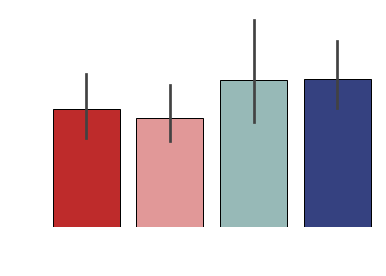

In [ ]:
from session_timing import plot_latency
plot_latency(session_df_correct, session_obj)

In [ ]:
session_df_correct['valence_1_back'] = session_df_correct['valence'].shift(1)

In [ ]:
session_df_correct.groupby('valence_1_back')['Fixation Success'].median()

valence_1_back
-1.0    1934.5
-0.5    1851.0
 0.5    2026.0
 1.0    2938.0
Name: Fixation Success, dtype: Float64

In [ ]:
session_df_correct.groupby('valence_1_back')['correct'].mean()

valence_1_back
-1.0    1.0
-0.5    1.0
 0.5    1.0
 1.0    1.0
Name: correct, dtype: float64

In [ ]:
session_df_correct[['valence', 'valence_1_back', 'Fixation On', 'Fixation Success', 'CS On']].head(20)

,valence,valence_1_back,Fixation On,Fixation Success,CS On
0,-1.0,NaN,211,924,931
1,-0.5,-1.0,1103,1799,1811
2,1.0,-0.5,1040,1583,1592
3,1.0,1.0,1847,2522,2538
4,0.5,1.0,1847,2523,2538
5,0.5,0.5,1043,1737,1752
6,-0.5,0.5,1066,1758,1773
7,-1.0,-0.5,1045,1752,1769
8,-0.5,-1.0,1086,1779,1794
10,-1.0,-0.5,1034,1803,1818


In [ ]:
session_df_correct['Fixation Success'] - session_df_correct['Fixation On']

1       542
2       745
3       537
4       793
5       673
       ... 
601     757
602    1172
604    7830
605     744
606     725
Length: 351, dtype: Int32